## 20 Data Points

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_Q1A.csv')

In [3]:
df.head()

0           1
0  0.574620  -14.190397
1 -0.777297   21.172794
2 -1.055254   36.815845
3 -1.390366   54.473582
4  1.673447 -796.041623

In [4]:
df1 = df[0:20]
x = np.array(df1['0']).reshape(-1,1)
y = np.array(df1['1']).reshape(-1,1)

In [5]:
x.shape

(20, 1)

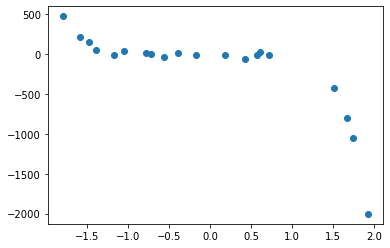

In [6]:
plt.scatter(x,y)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

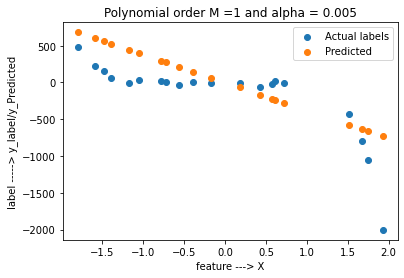

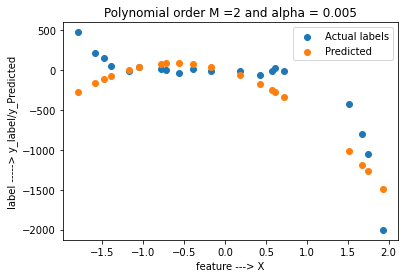

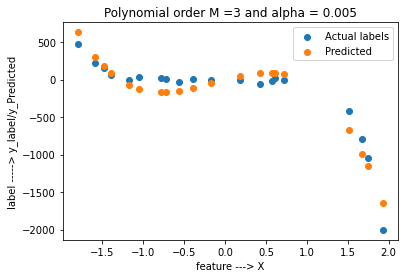

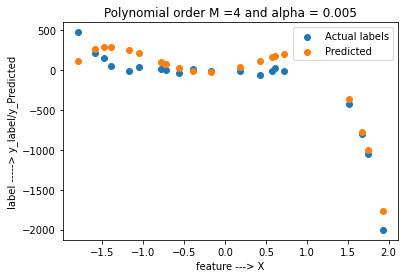

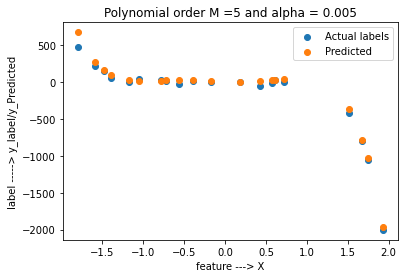

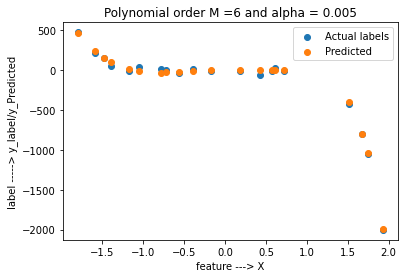

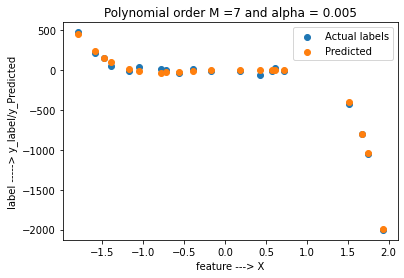

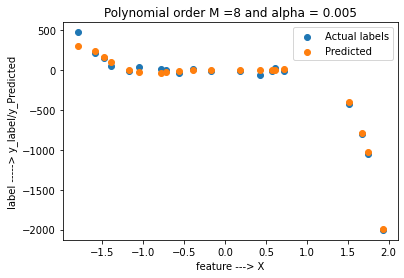

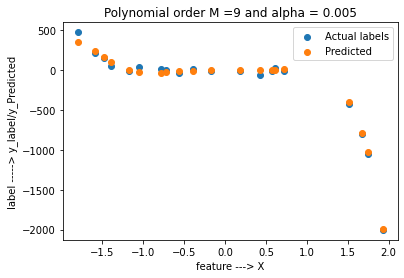

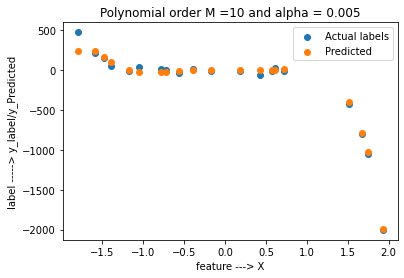

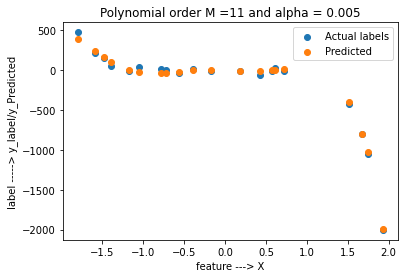

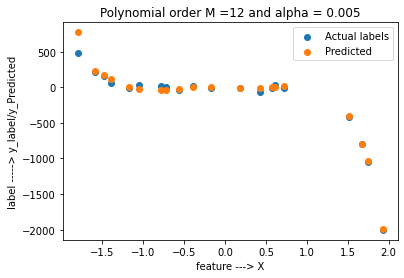

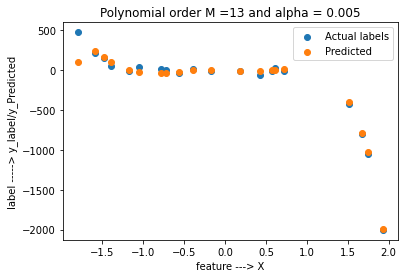

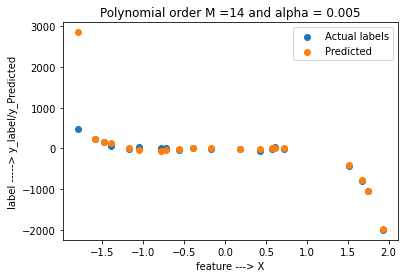

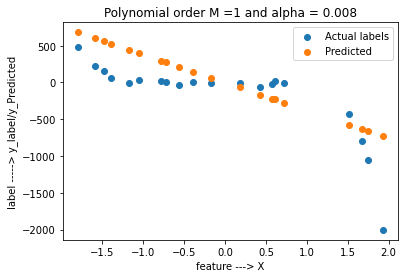

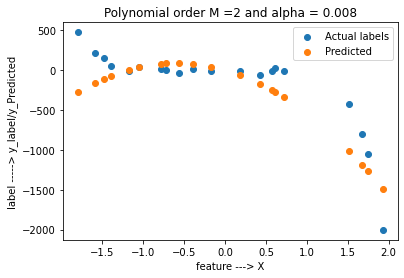

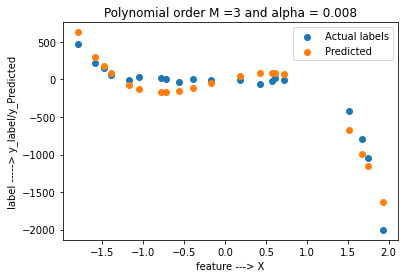

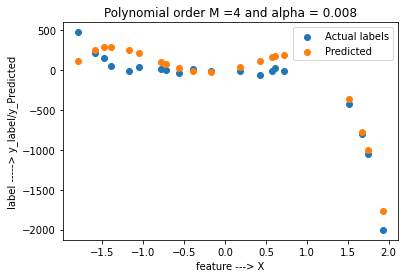

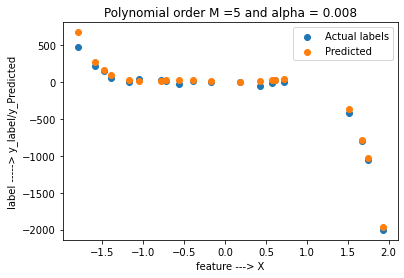

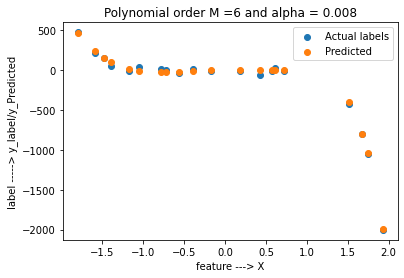

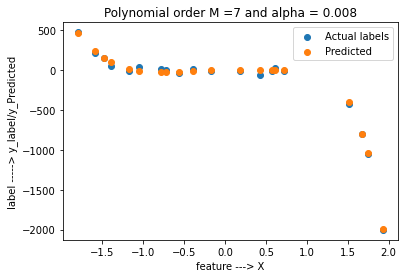

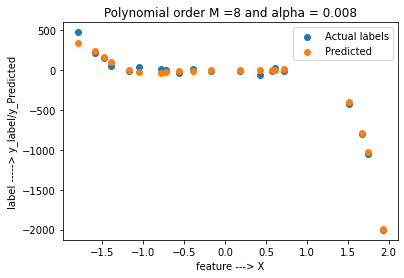

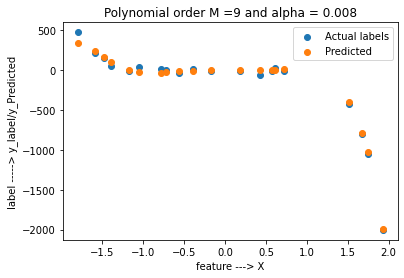

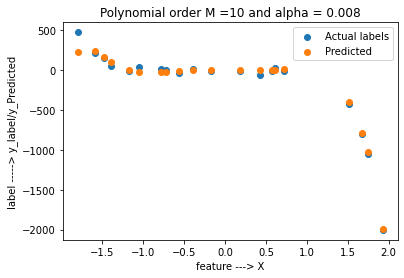

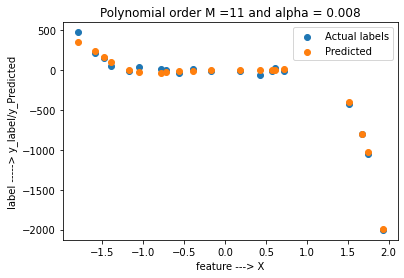

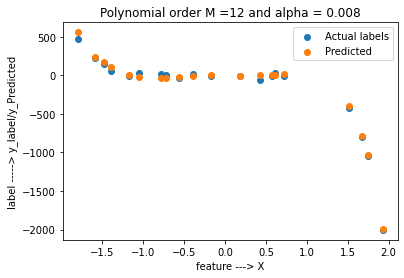

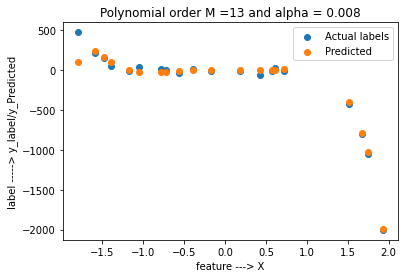

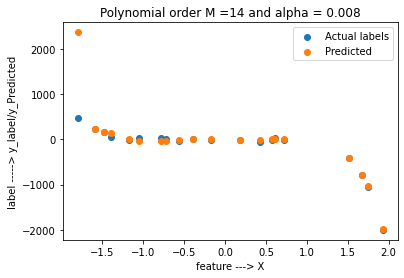

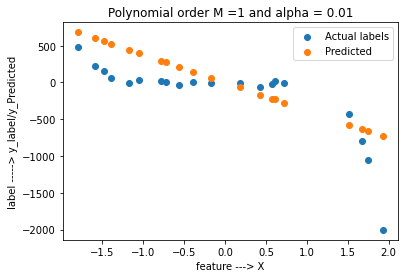

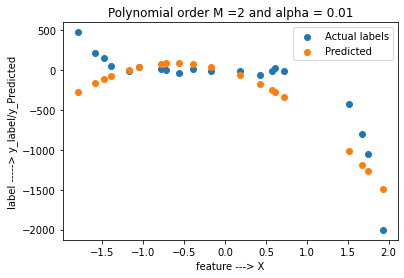

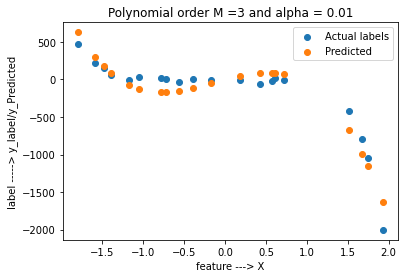

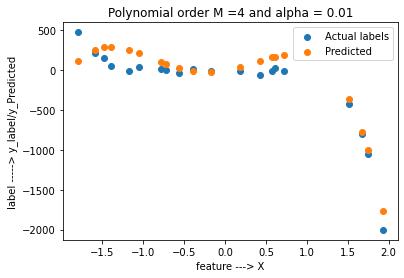

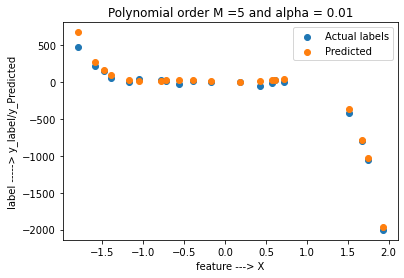

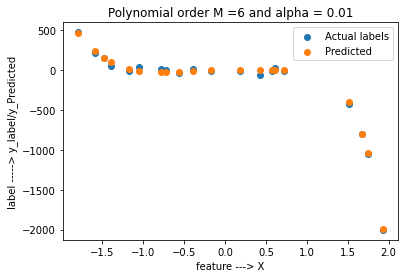

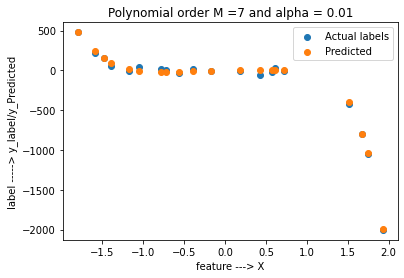

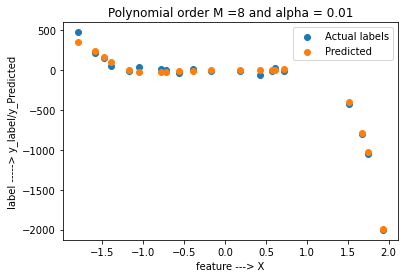

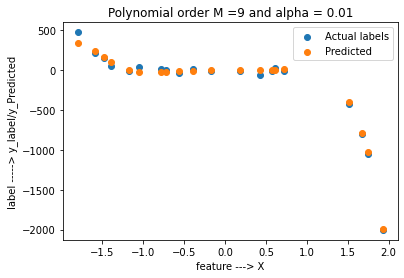

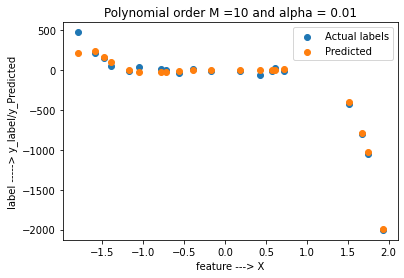

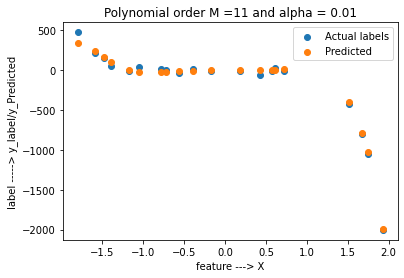

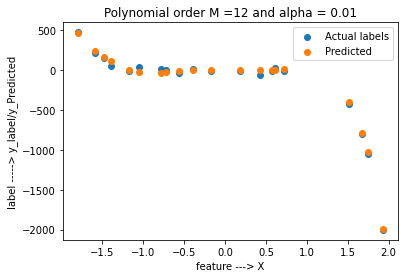

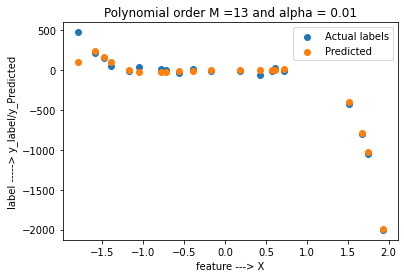

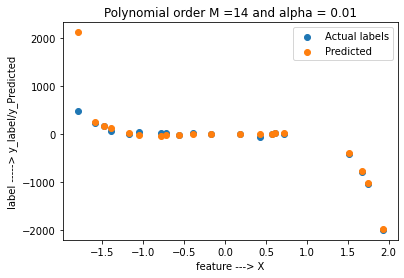

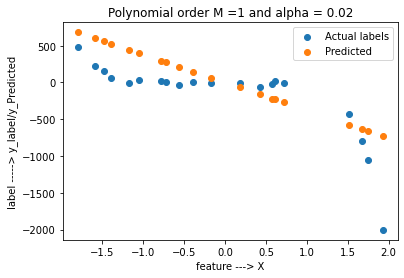

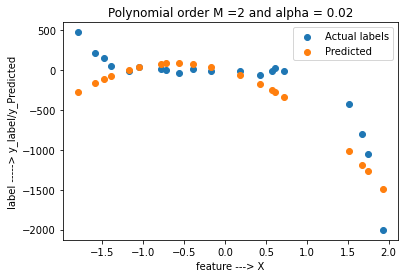

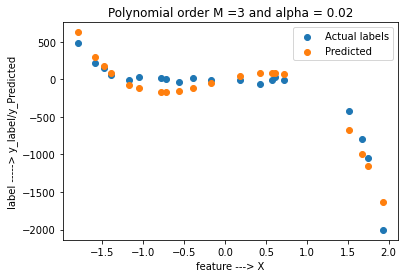

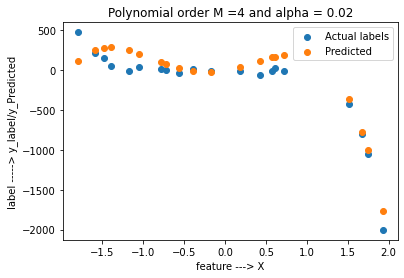

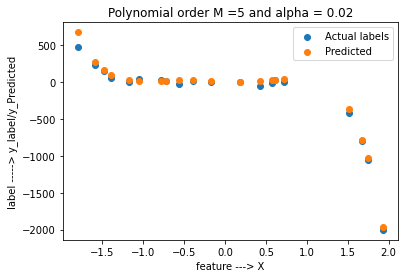

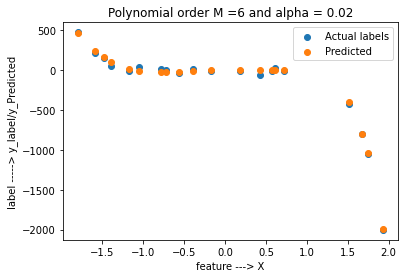

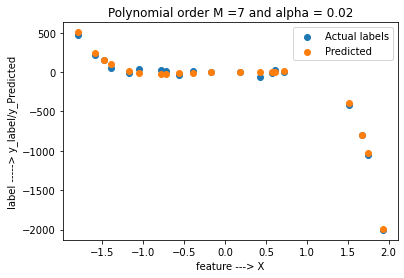

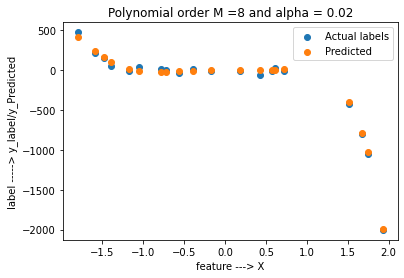

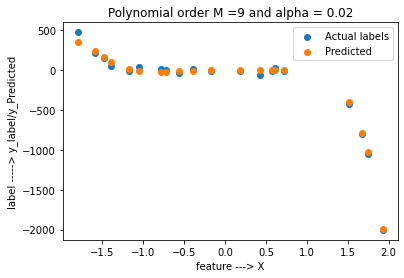

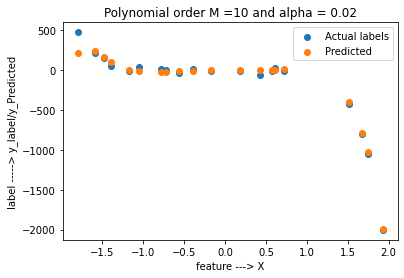

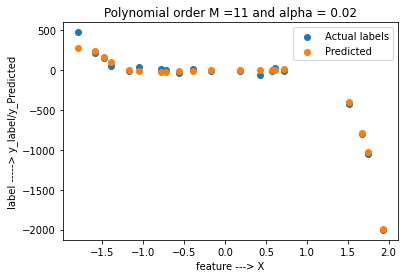

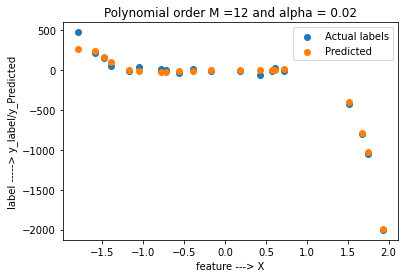

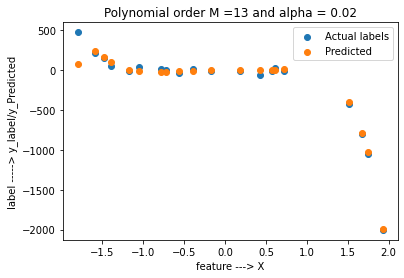

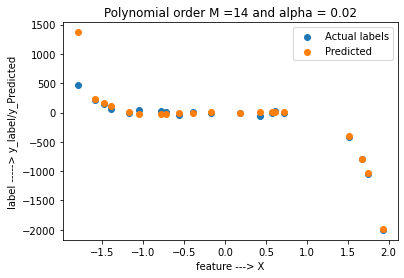

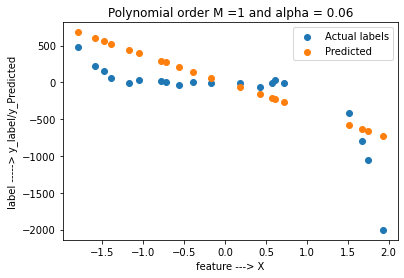

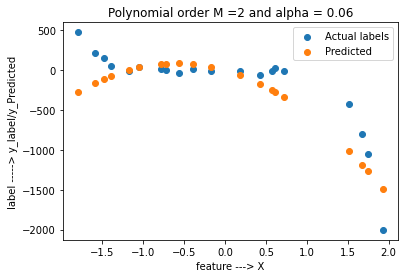

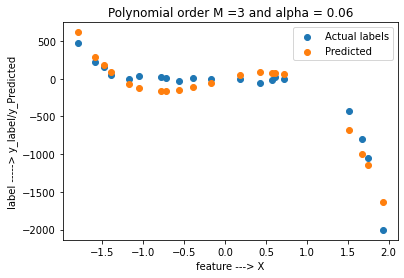

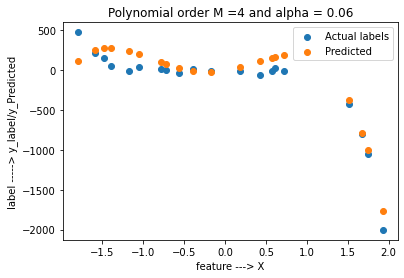

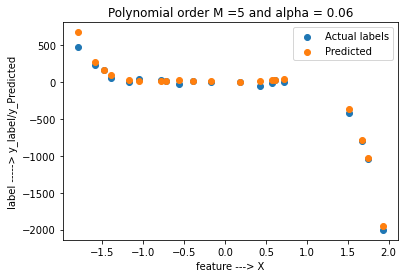

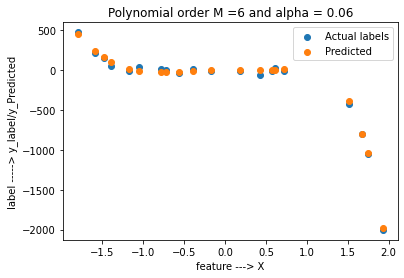

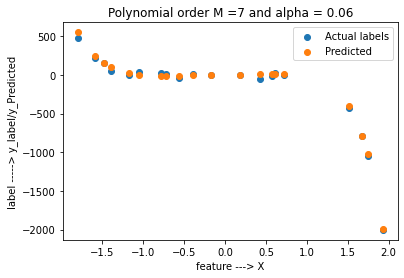

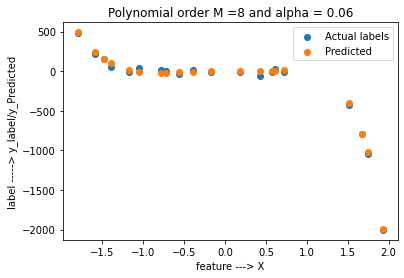

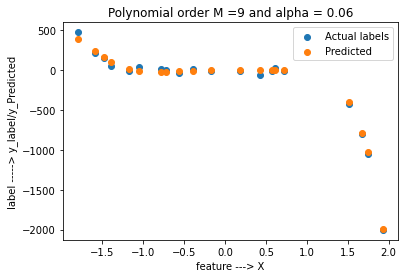

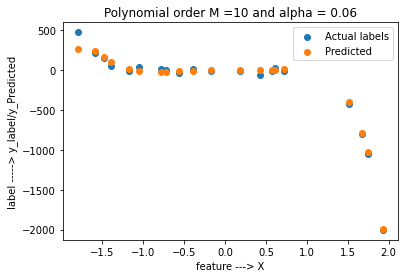

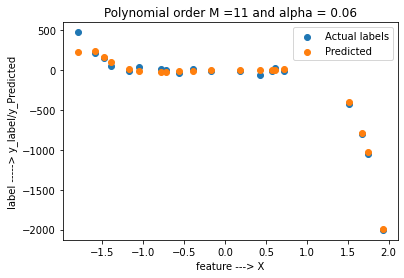

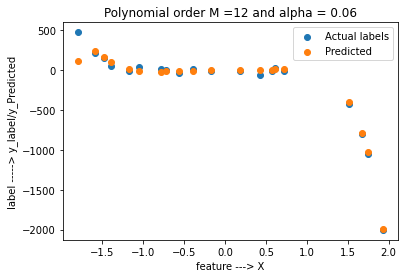

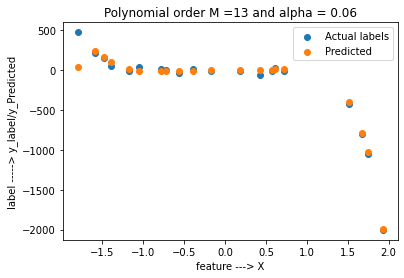

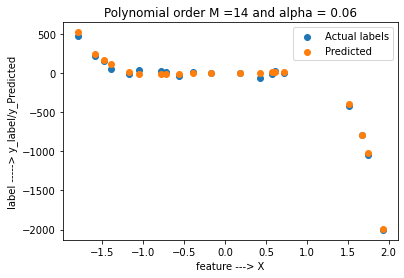

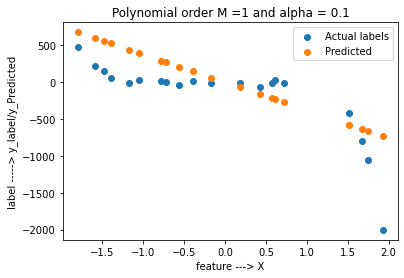

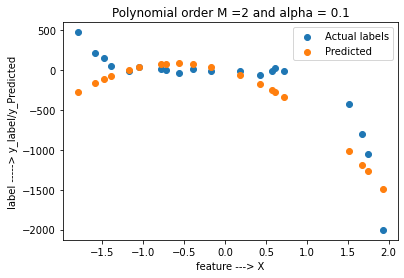

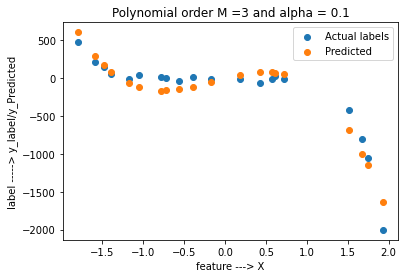

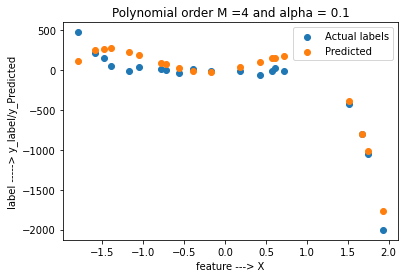

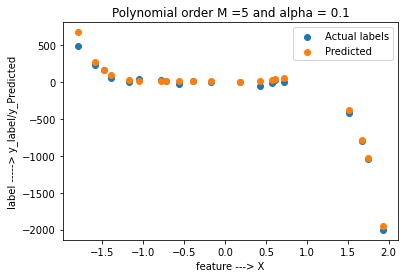

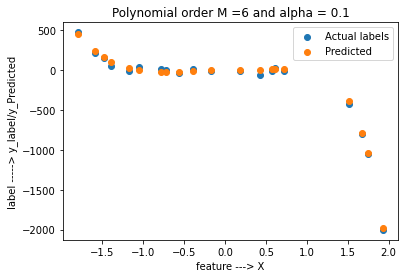

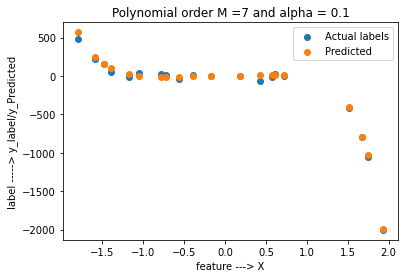

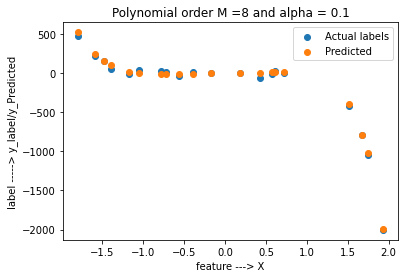

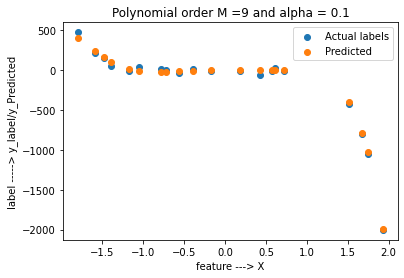

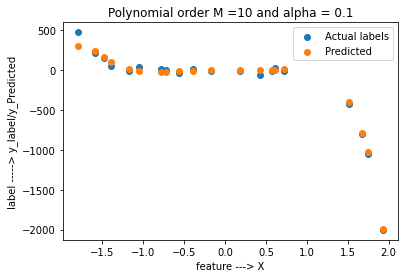

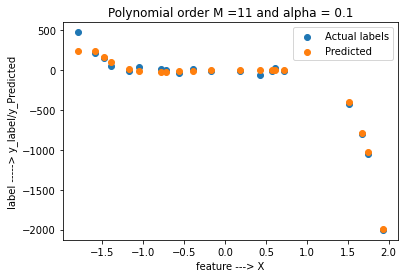

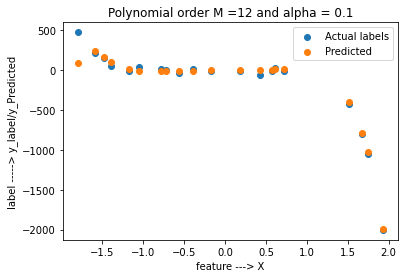

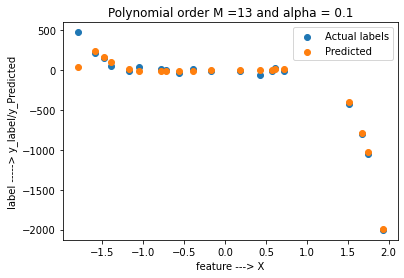

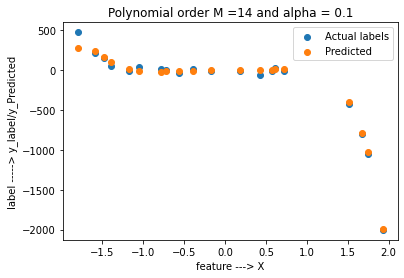

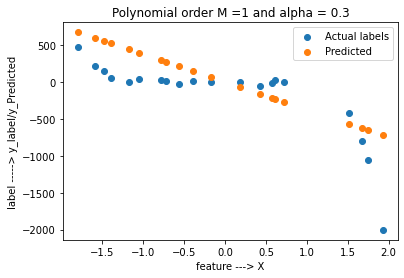

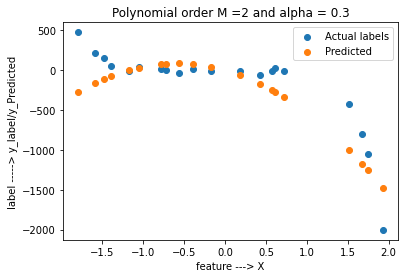

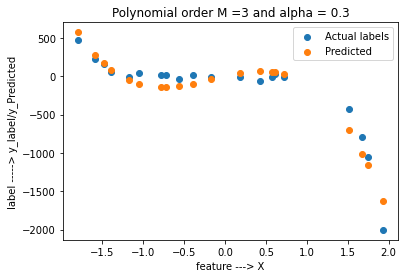

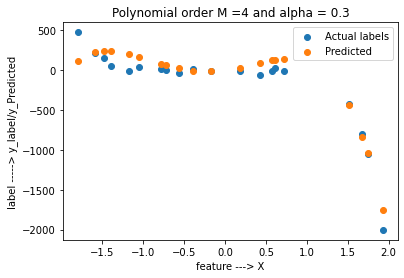

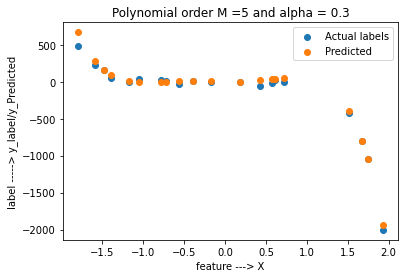

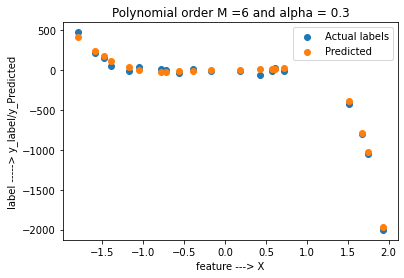

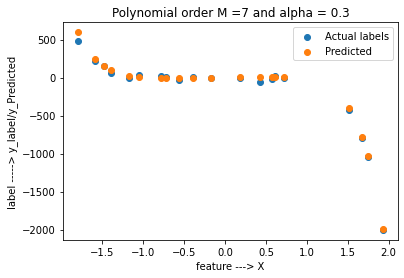

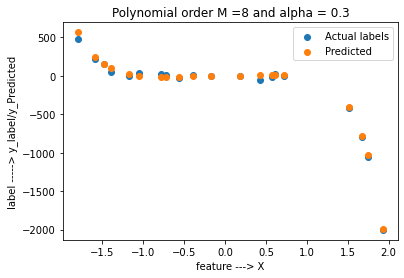

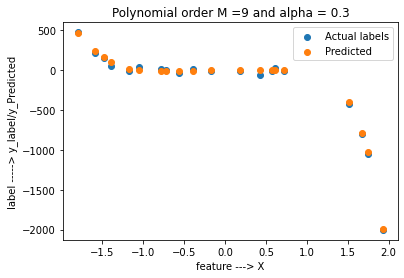

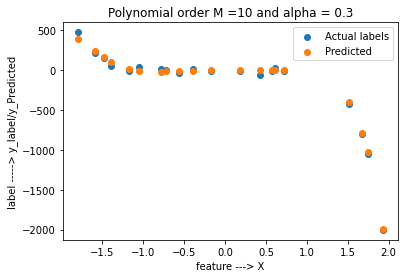

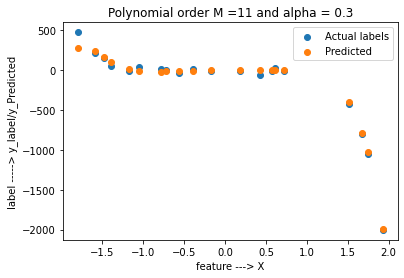

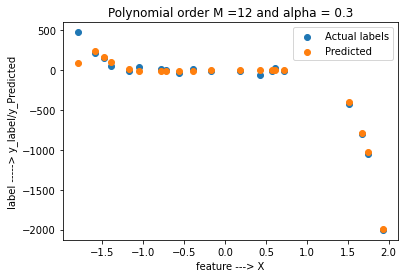

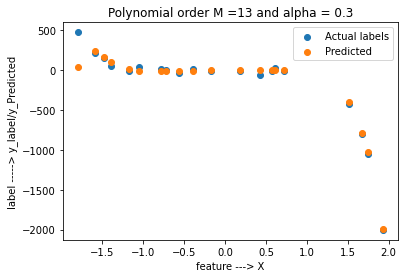

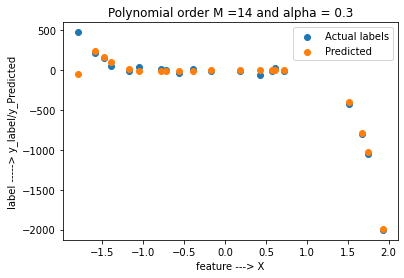

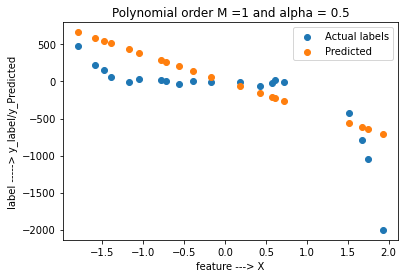

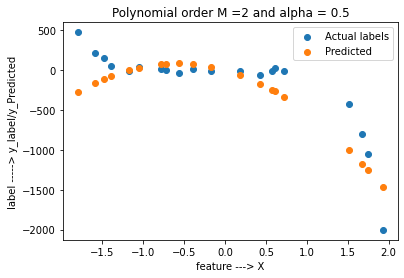

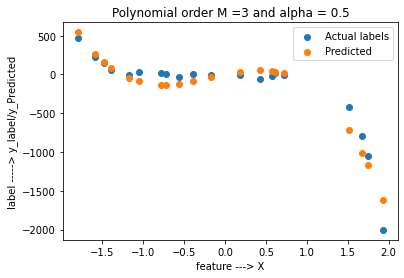

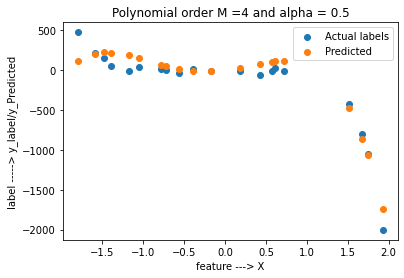

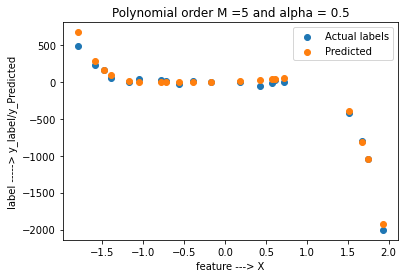

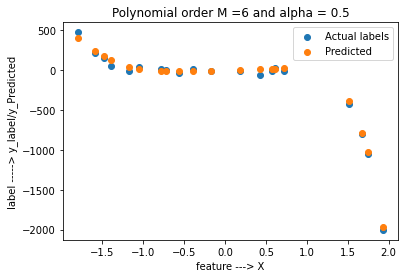

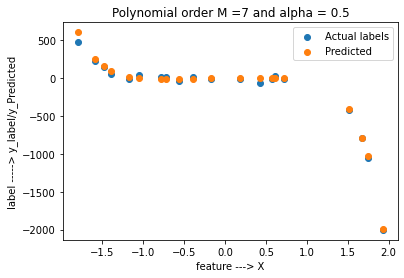

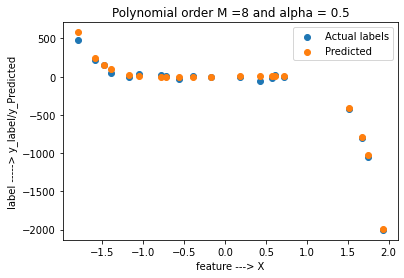

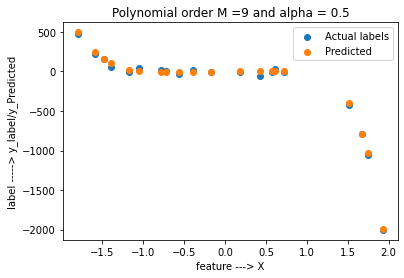

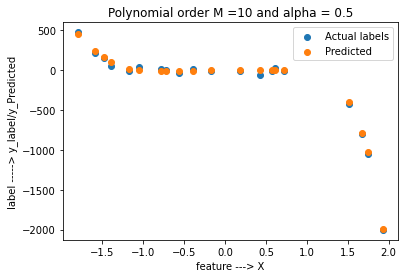

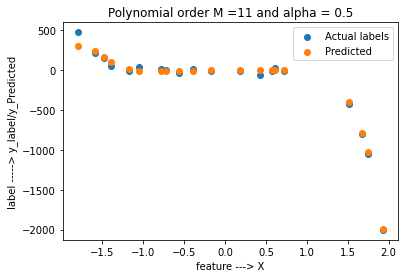

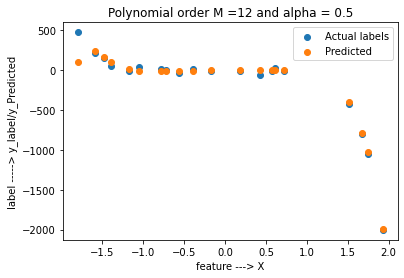

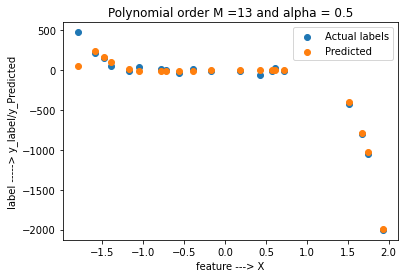

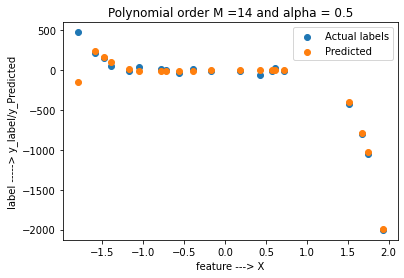

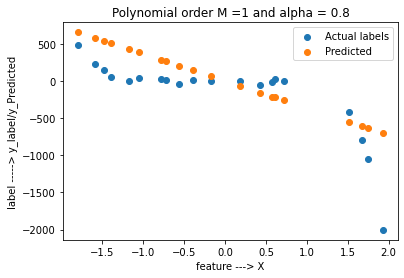

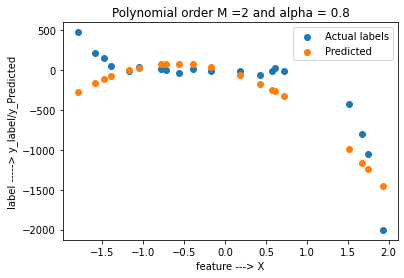

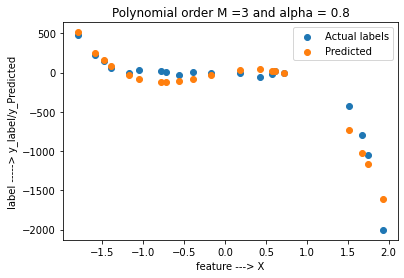

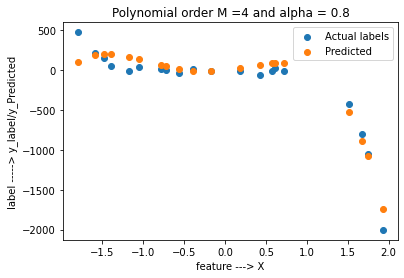

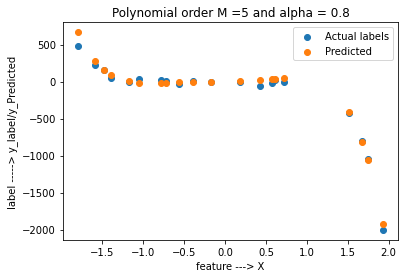

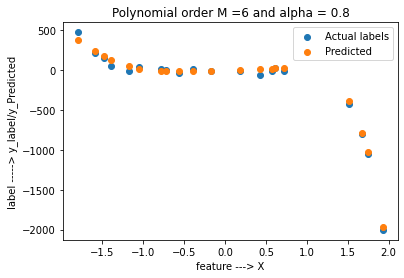

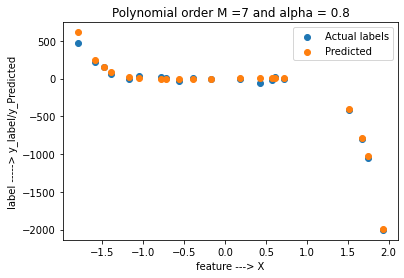

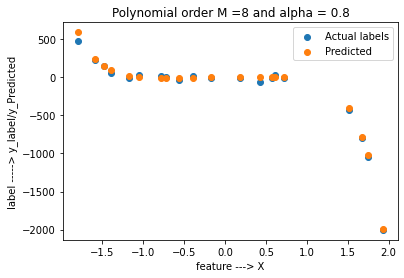

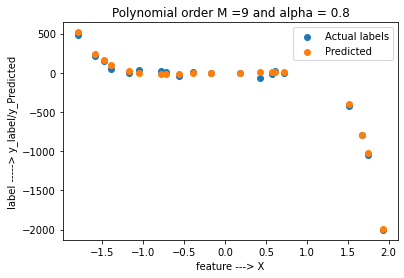

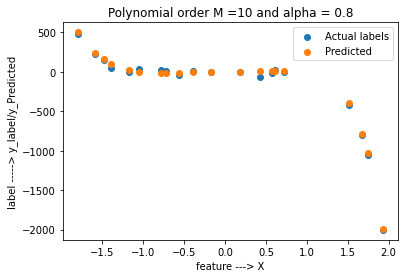

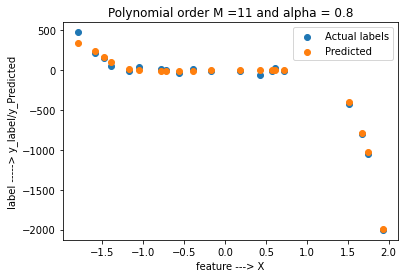

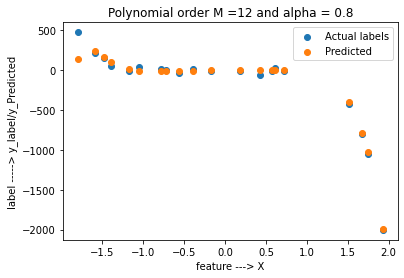

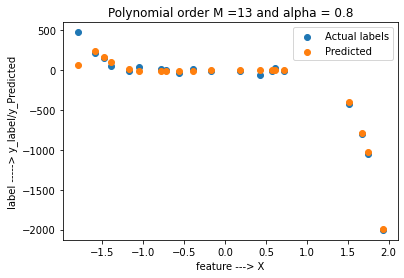

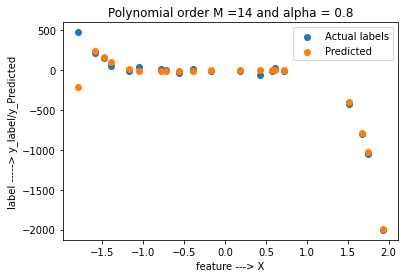

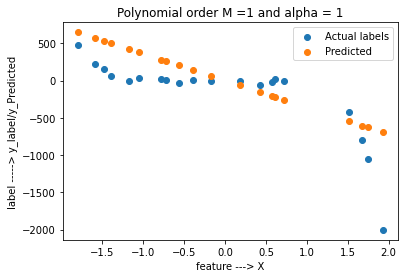

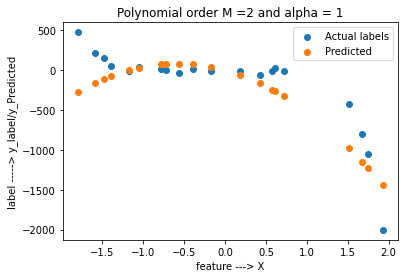

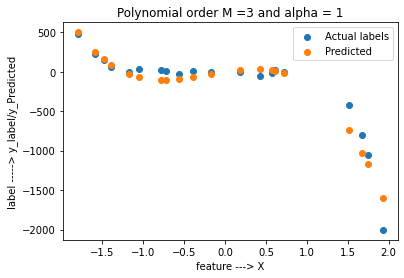

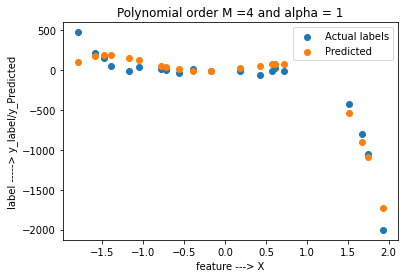

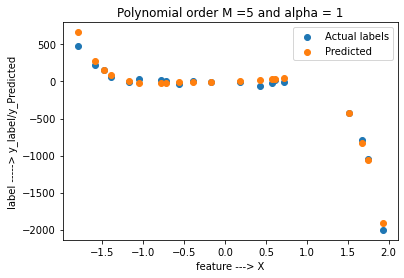

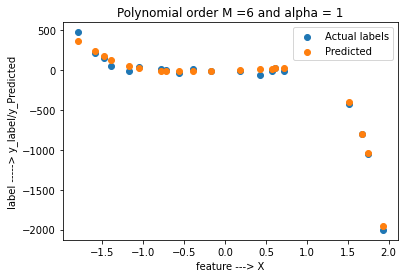

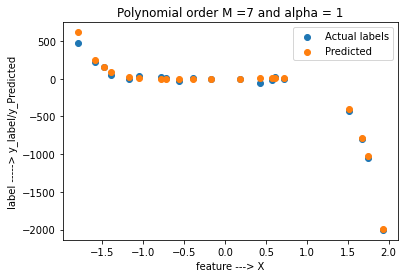

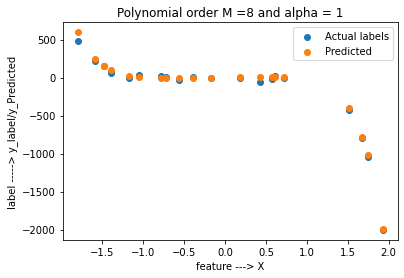

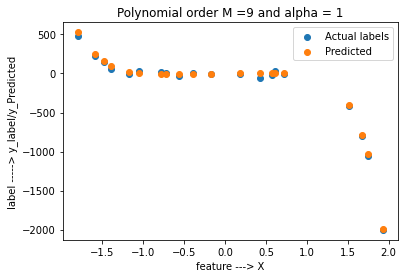

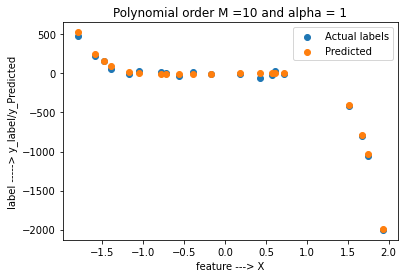

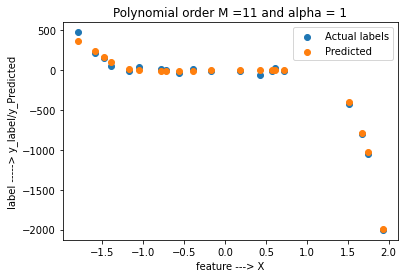

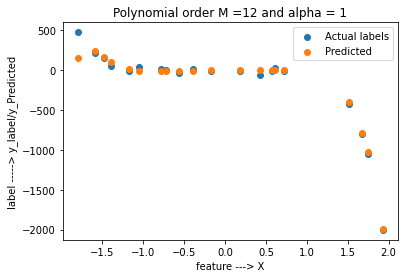

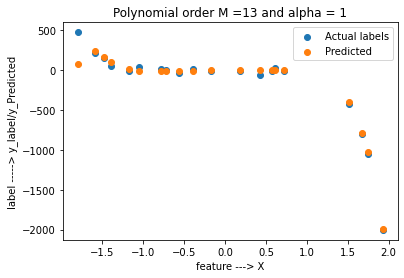

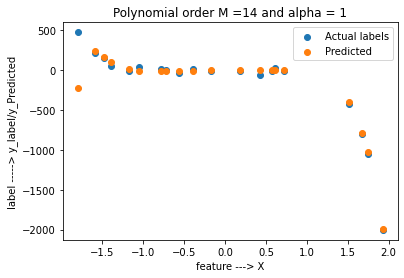

In [8]:
alpha_ = [0.005,0.008,0.01,0.02,0.06,0.1,0.3,0.5,0.8,1]
for k in alpha_:
    # Training root mean square error 
    train_error = []

    # Test root mean square error 
    test_error = []
    for d in range(1,15):
        
        # Creating polynomial data for degree 'd'
        polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
        poly_features = polynomial_converter.fit_transform(x)
        
        # Splitting new polynomial dataset into train, test
        x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

        # Training on new polynomial dataset
        model = Ridge(alpha=k)
        model.fit(x_train,y_train)

        # Prediction on both training and testing set
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)

        # Calculation of errors

        # Errors on Train Set
        train_rmse_error = np.sqrt(mean_squared_error(y_train,train_pred))
        # Errors on Test Set
        test_rmse_error = np.sqrt(mean_squared_error(y_test,test_pred))
        # Append errors to lists for plotting later
        train_error.append(train_rmse_error)
        test_error.append(test_rmse_error)

        coeff = np.array(model.coef_)
        predicted_y = []

        for j in range(len(df1['0'])):
            y_hat =0
            for i in range(d+1):
                y_hat = y_hat + coeff[0][i]*(df1['0'].iloc[j])**i
            predicted_y.append(y_hat)

        plt.figure()
        plt.scatter(x,y,label='Actual labels')
        plt.scatter(x,predicted_y,label ='Predicted')
        plt.xlabel('feature ---> X')
        plt.ylabel('label -----> y_label/y_Predicted')
        plt.title(f'Polynomial order M ={d} and alpha = {k}')
        plt.legend()
        plt.show()

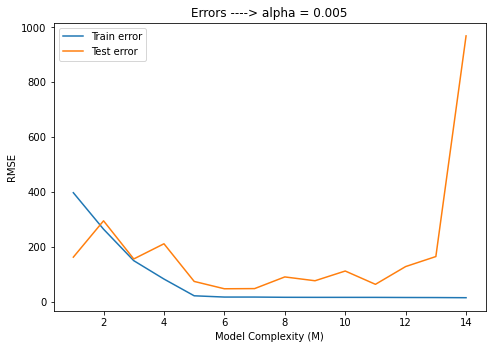

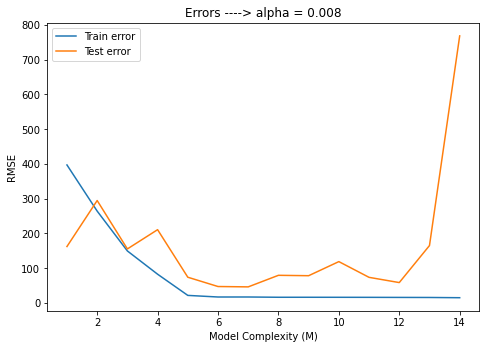

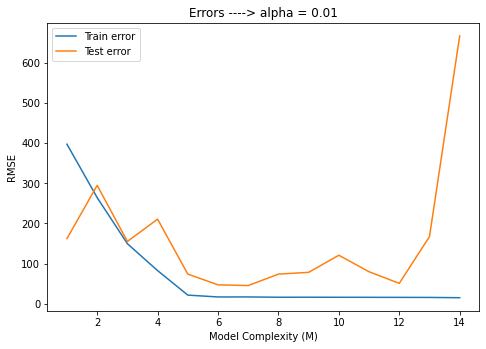

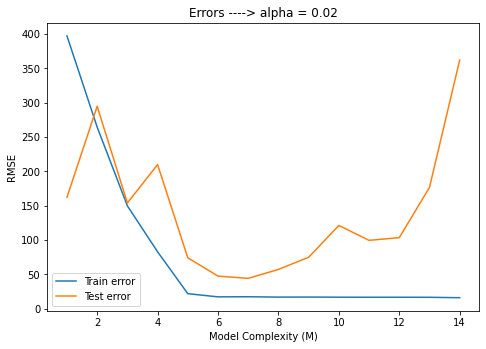

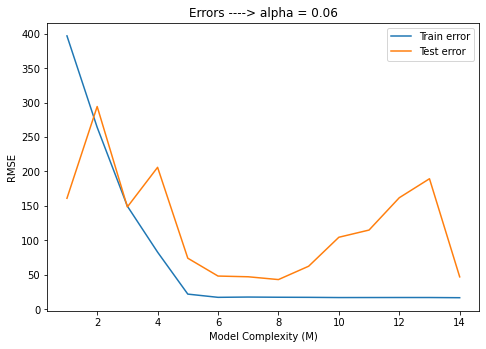

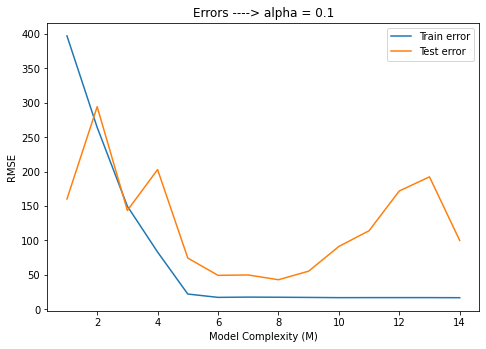

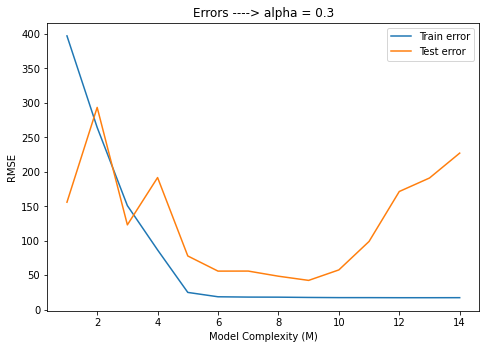

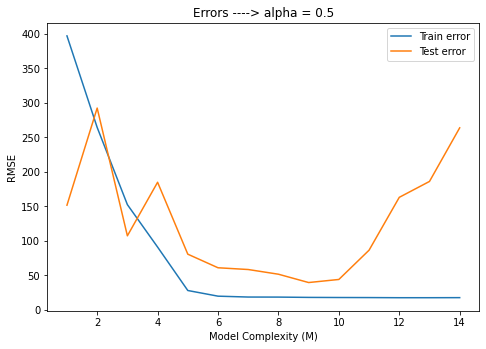

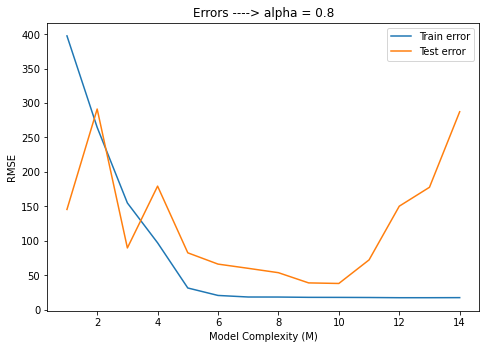

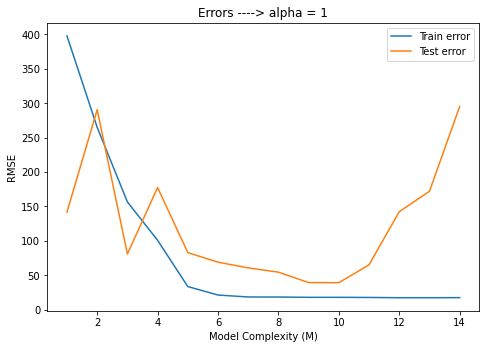

In [9]:
alpha_ = [0.005,0.008,0.01,0.02,0.06,0.1,0.3,0.5,0.8,1]
for k in alpha_:
    # Training root mean square error 
    train_error = []

    # Test root mean square error 
    test_error = []
    for d in range(1,15):
        
        # Creating polynomial data for degree 'd'
        polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
        poly_features = polynomial_converter.fit_transform(x)

        # Splitting new polynomial dataset into train, test
        x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

        # Training on new polynomial dataset
        model = Ridge(alpha=k)
        model.fit(x_train,y_train)

        # Prediction on both training and testing set
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)

        # Calculation of errors

        # Errors on Train Set
        train_rmse_error = np.sqrt(mean_squared_error(y_train,train_pred))
        # Errors on Test Set
        test_rmse_error = np.sqrt(mean_squared_error(y_test,test_pred))
        # Append errors to lists for plotting later
        train_error.append(train_rmse_error)
        test_error.append(test_rmse_error)

    
    fig = plt.figure()
    axes1 = fig.add_axes([0,0,1,1])
    plt.plot(range(1,15),train_error,label='Train error')
    plt.plot(range(1,15),test_error,label='Test error')
    plt.xlabel("Model Complexity (M)")
    plt.ylabel("RMSE")
#     axes1.set_ylim(0,50)
    plt.title(f'Errors ----> alpha = {k}')
    plt.legend()
    plt.show()

In [10]:
model.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1)>

In [11]:
final_poly_converter = PolynomialFeatures(degree=9,interaction_only =False,include_bias=True)
final_poly_features = final_poly_converter.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)
    
# Training
final_model = Ridge(alpha =1)
final_model.fit(x_train,y_train)

# Prediction on both training and testing set
train_pred_ = final_model.predict(x_train)
test_pred_ = final_model.predict(x_test)

# Calculation of errors
# Errors on Train Set
train_RMSE_ = np.sqrt(mean_squared_error(y_train,train_pred_))
print(f'Train root mean squared error is {train_RMSE_}')
# Errors on Test Set
test_RMSE_ = np.sqrt(mean_squared_error(y_test,test_pred_))
print(f'Test root mean squared error is {test_RMSE_}')

Train root mean squared error is 17.977120304947807
Test root mean squared error is 39.38104102989278


<Figure size 432x288 with 0 Axes>

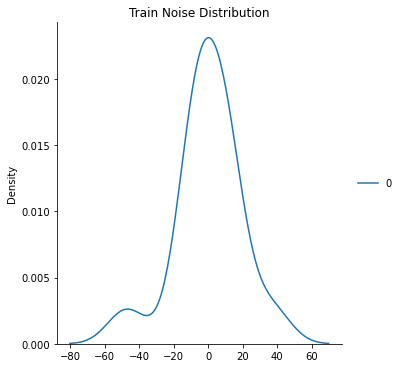

<Figure size 432x288 with 0 Axes>

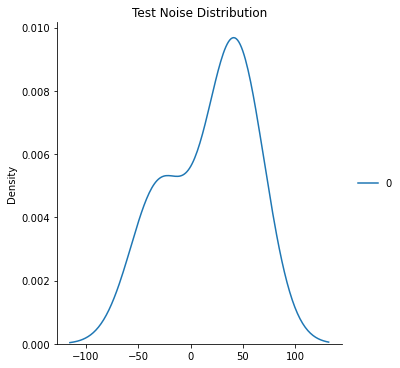

In [12]:
noise_train_ = y_train - train_pred_
noise_test_ = y_test - test_pred_
plt.figure()
sns.displot(noise_train_,kind = 'kde')
plt.title("Train Noise Distribution")
plt.show()
plt.figure()
sns.displot(noise_test_,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()

In [13]:
train_noise_mean_ = np.mean(noise_train_)
train_noise_var_ = np.var(noise_train_)
test_noise_mean_ = np.mean(noise_test_)
test_noise_var_ = np.var(noise_test_)

In [14]:
print(f"Train set ---> Mean = {train_noise_mean_}  ; variance = {train_noise_var_}")
print(f"Test set ---> Mean = {test_noise_mean_}  ; variance = {test_noise_var_}")

Train set ---> Mean = 4.593151256163505e-14  ; variance = 323.17685445856665
Test set ---> Mean = 18.001146361630706  ; variance = 1226.825122265248


In [15]:
model_coefficients = np.array(final_model.coef_)

In [16]:
model_coefficients[0]

array([  0.        ,  11.93000667,  -2.34581447,   5.14265329,
        -2.41701635,  -7.48085806,  -2.36257819, -17.89836822,
        -2.3243736 ,   1.39424037])

In [17]:
final_poly_converter.get_feature_names(df1.columns)

['1', '0', '0^2', '0^3', '0^4', '0^5', '0^6', '0^7', '0^8', '0^9']

In [18]:
# phi -----> Design Matrix
import numpy.matlib
opt_deg =9
phi = [[0] * (opt_deg+1) for i in range(len(df1))]

for i in range(len(df1)):
    for d in range(opt_deg+1):
        val = df1['0'].iloc[i]**d
        phi[i][d]=val

phi_transpose = [[phi[j][i] for j in range(len(df1))] for i in range(d+1)]
weights_ =np.matmul(np.matmul(np.linalg.inv(np.matmul(phi_transpose,phi)),phi_transpose),y)
weights_ =weights_.reshape(1,opt_deg+1)

In [19]:
# weights -----> coefficient of the polynomial of deg = opt_deg
weights_[0]

array([ -21.34120877,  -24.59381959,   97.02817033,   36.96246872,
       -121.70240945,   -0.68356427,   46.2739757 ,  -28.53187891,
         -9.02619325,    3.51230785])

In [20]:
df_test = pd.read_csv('test_Q1A.csv')
X_test = np.array(df_test['0']).reshape(-1,1)
Y_test = np.array(df_test['1']).reshape(-1,1)

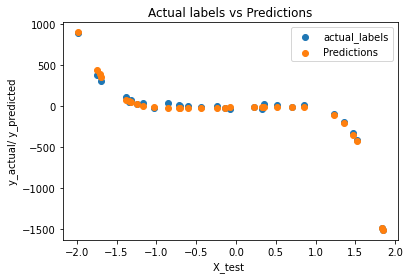

In [21]:
final_poly_converter = PolynomialFeatures(degree=9,interaction_only =False,include_bias=True)
final_poly_features = final_poly_converter.fit_transform(X_test)
pred = final_model.predict(final_poly_features)
plt.scatter(X_test,Y_test,label ='actual_labels')
plt.scatter(X_test,pred,label='Predictions')
plt.xlabel("X_test ")
plt.ylabel("y_actual/ y_predicted")
plt.title(f'Actual labels vs Predictions')
plt.legend()
plt.show()

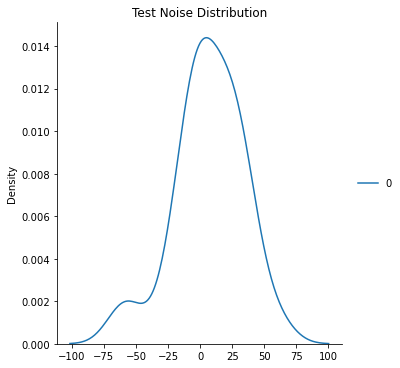

In [22]:
noise_test_ = Y_test-pred
sns.displot(noise_test_,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()

In [23]:
train_noise_mean_ = np.mean(noise_train_)
train_noise_var_ = np.var(noise_train_)

In [24]:
print(f"Train set ---> Mean = {train_noise_mean_}  ; variance = {train_noise_var_}")

Train set ---> Mean = 4.593151256163505e-14  ; variance = 323.17685445856665


## All/ 70 data points

In [25]:
x =np.array(df['0']).reshape(-1,1)
y = np.array(df['1']).reshape(-1,1)

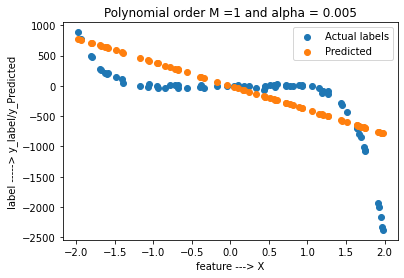

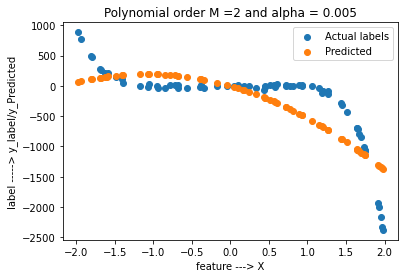

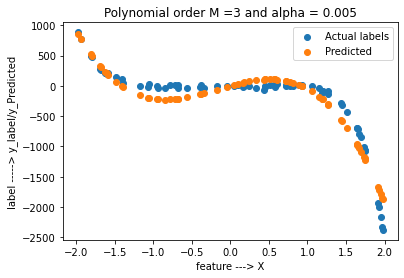

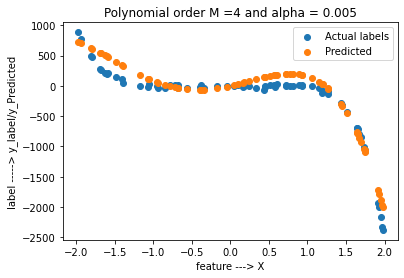

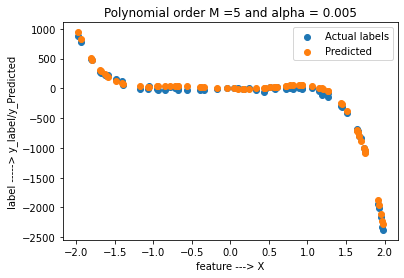

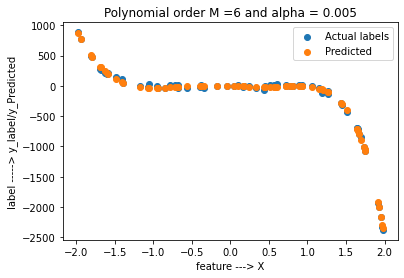

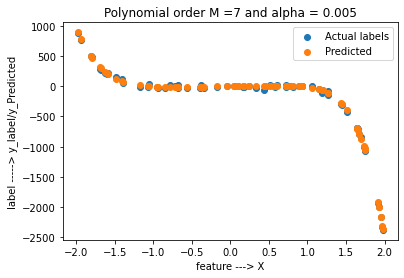

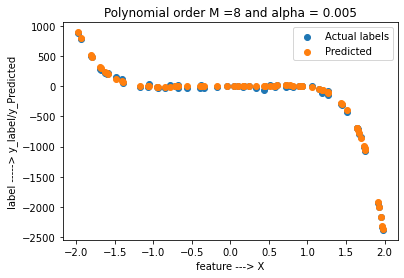

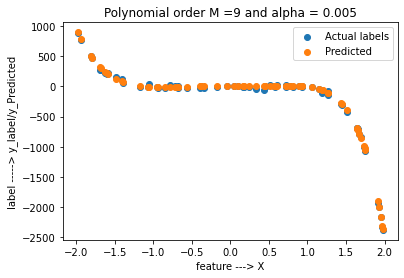

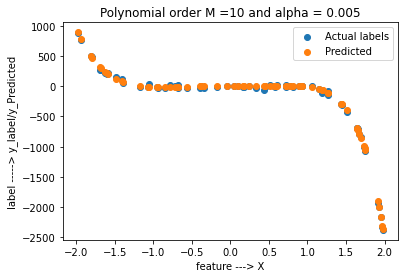

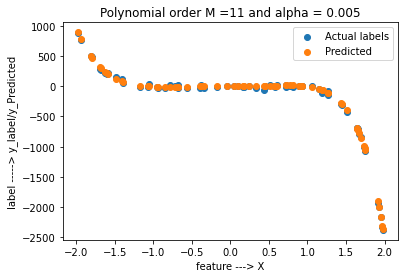

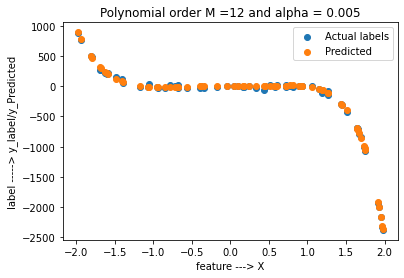

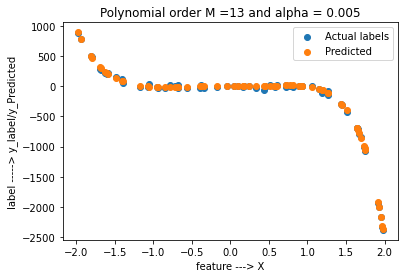

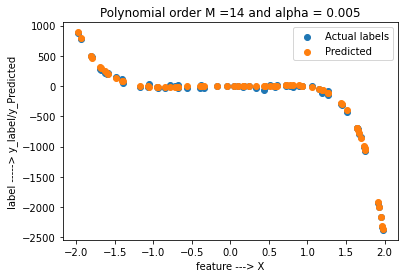

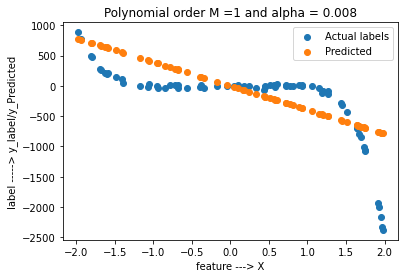

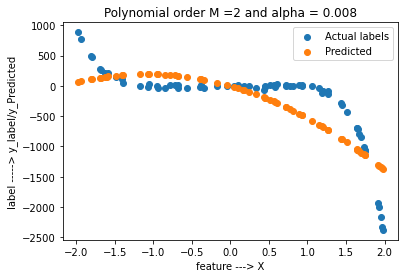

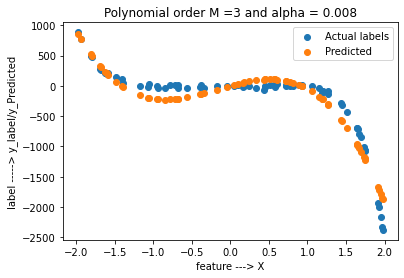

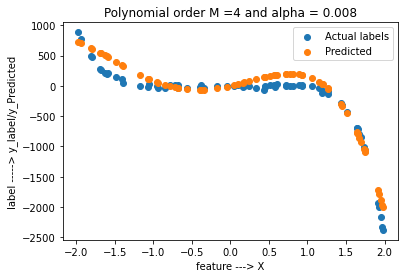

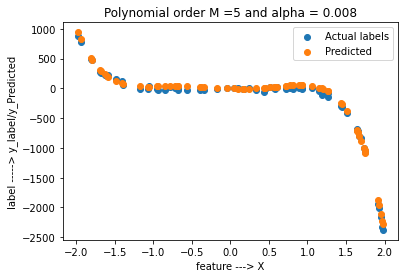

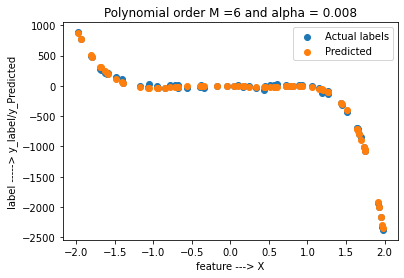

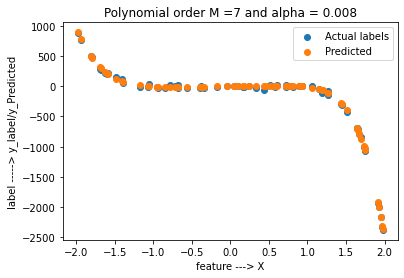

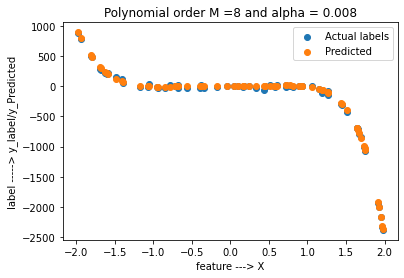

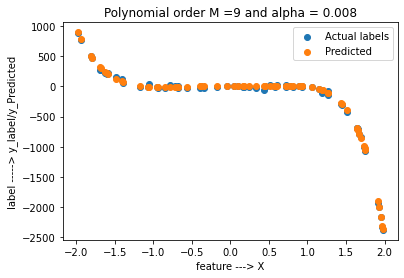

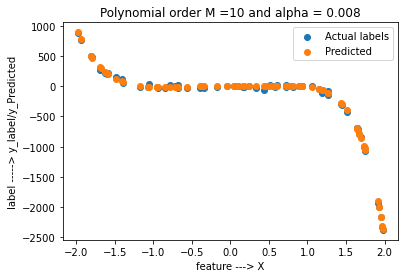

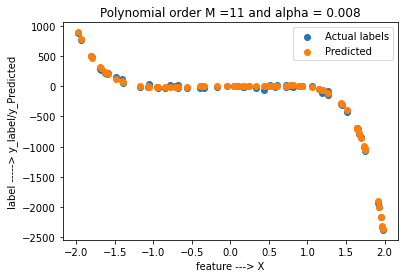

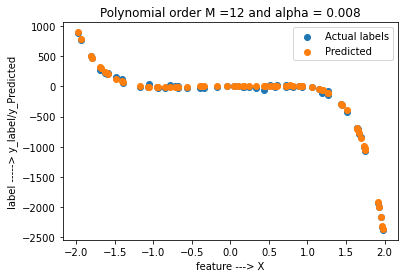

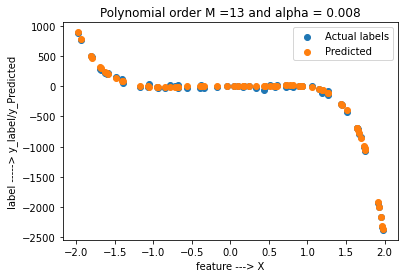

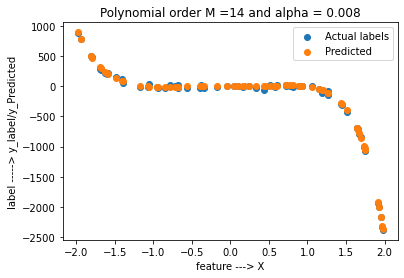

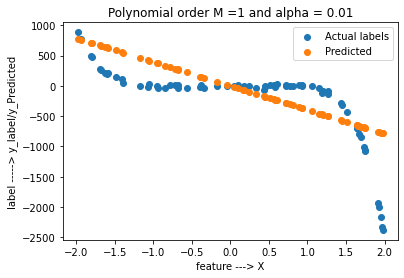

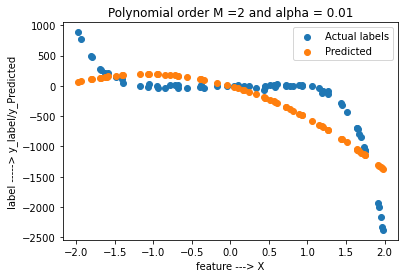

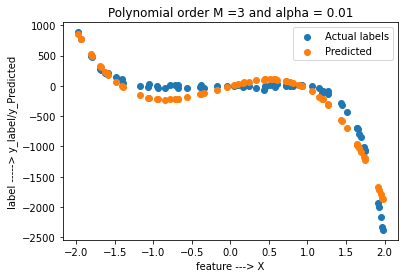

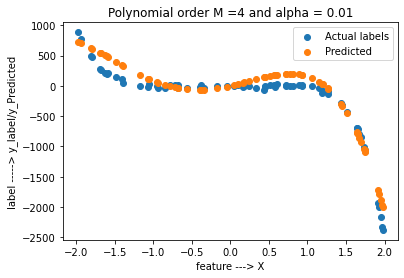

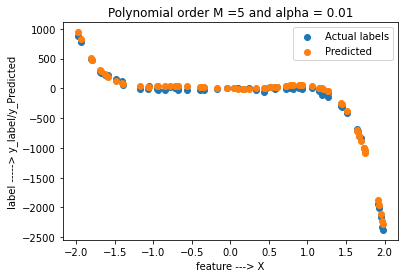

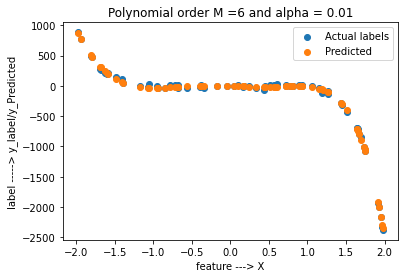

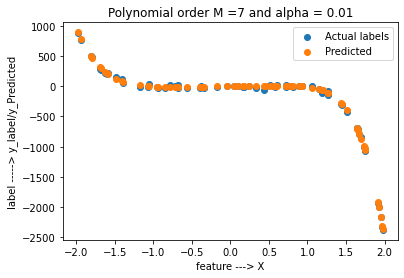

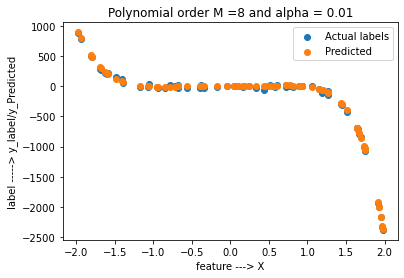

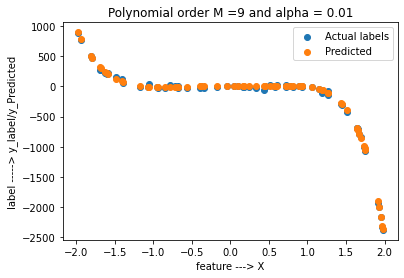

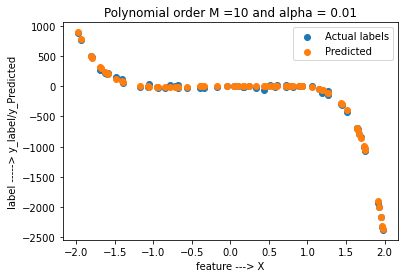

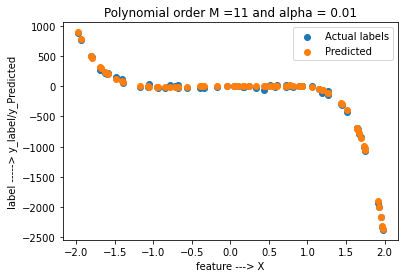

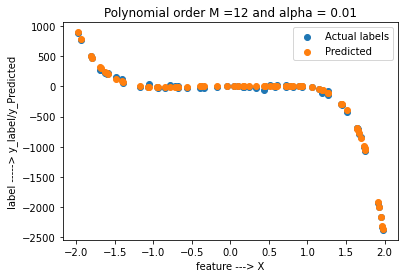

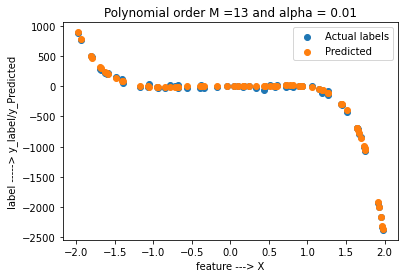

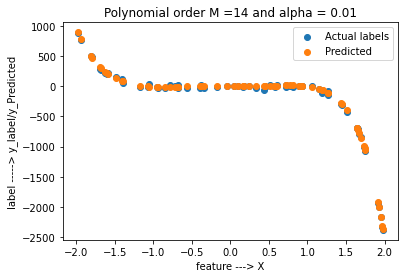

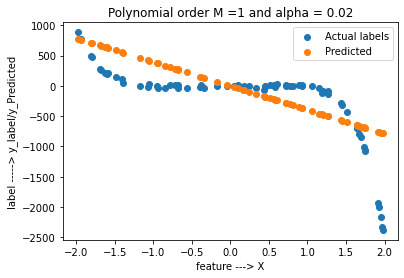

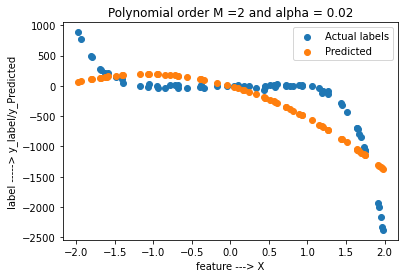

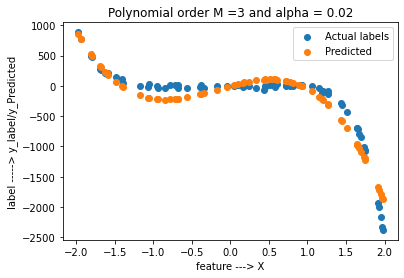

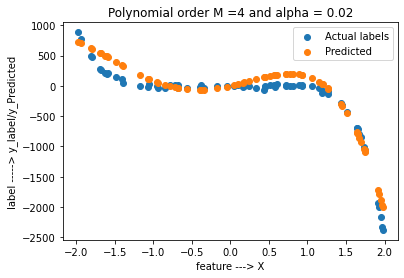

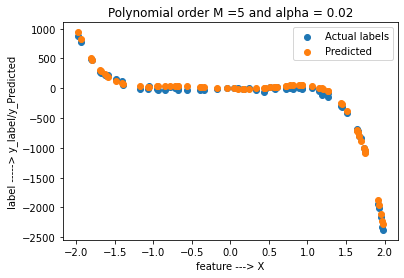

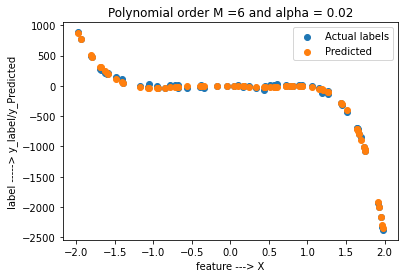

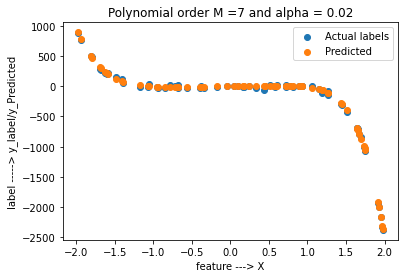

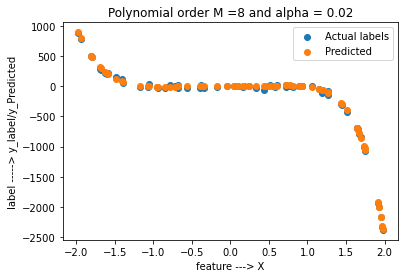

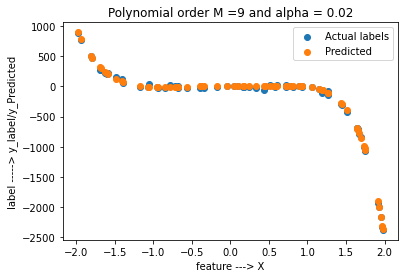

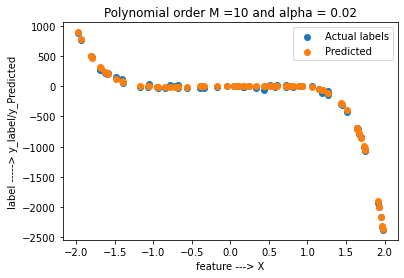

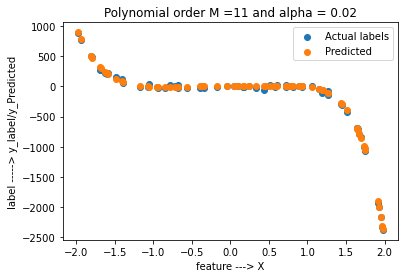

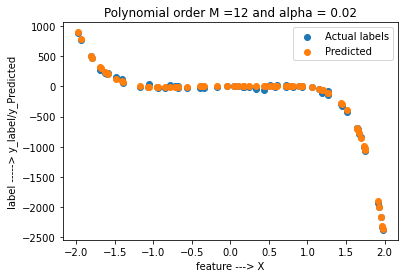

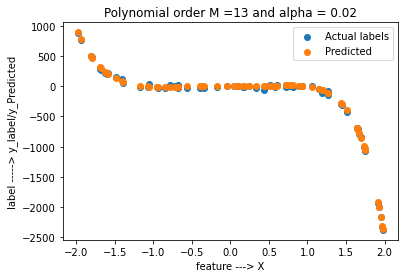

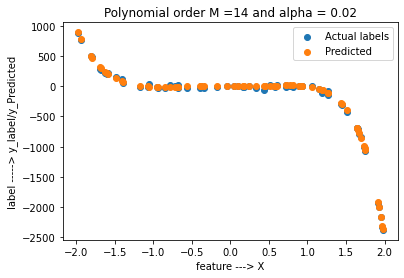

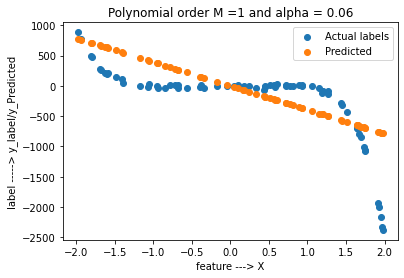

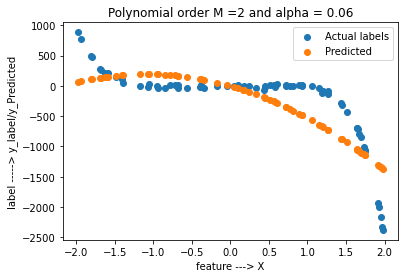

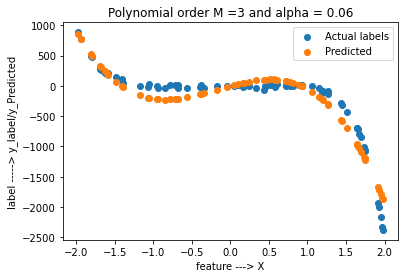

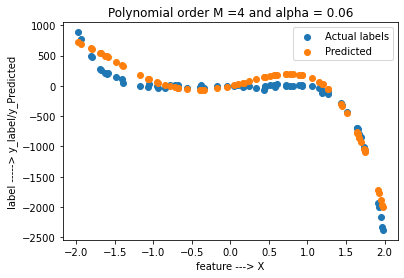

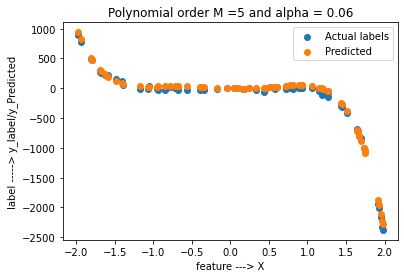

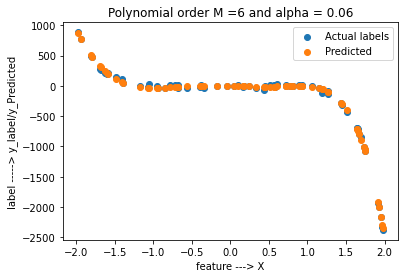

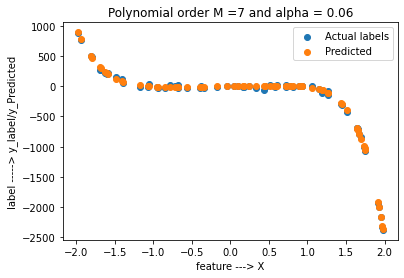

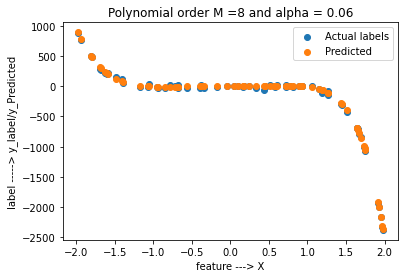

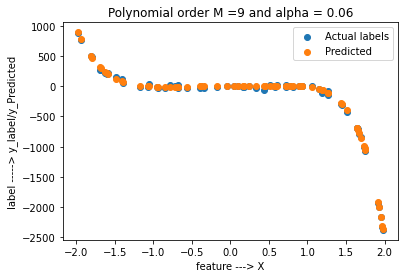

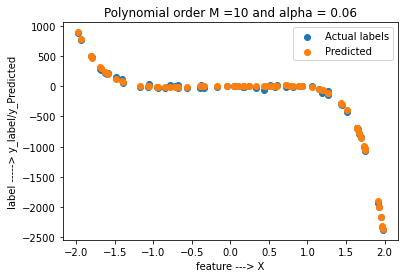

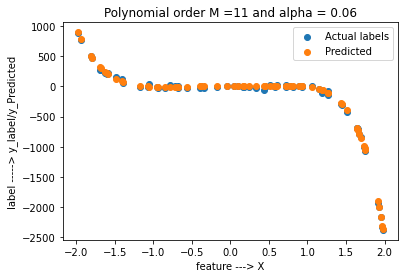

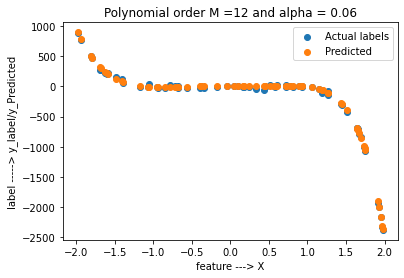

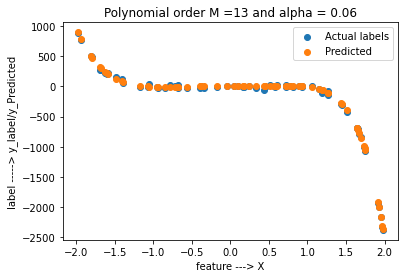

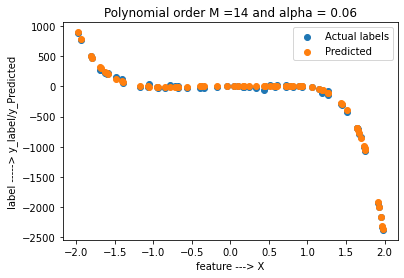

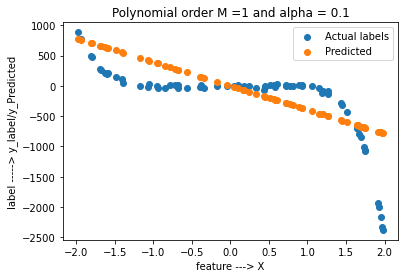

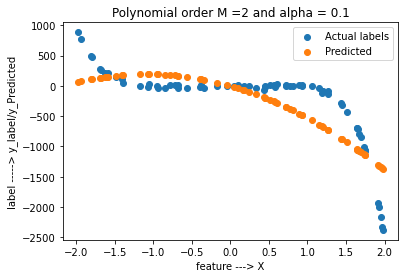

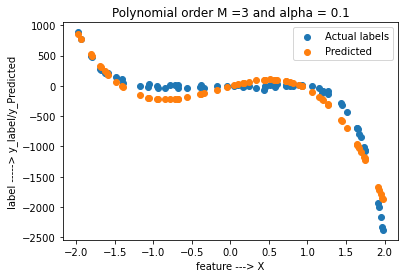

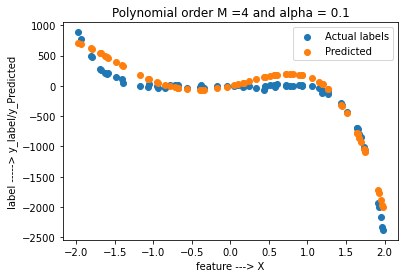

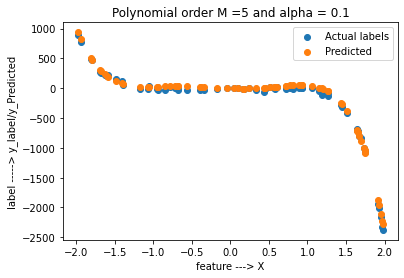

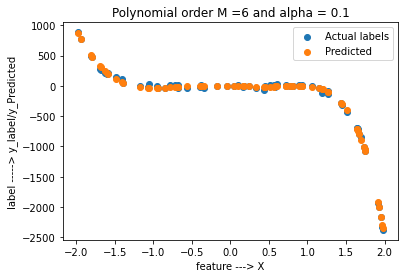

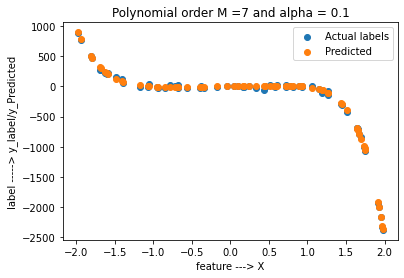

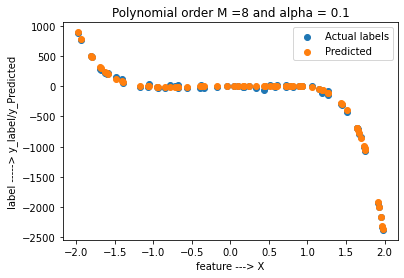

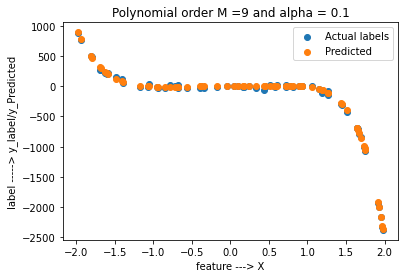

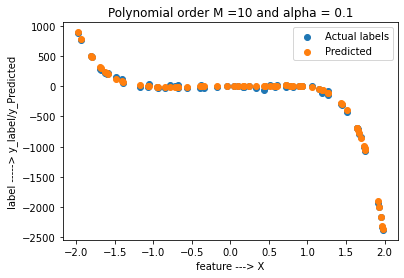

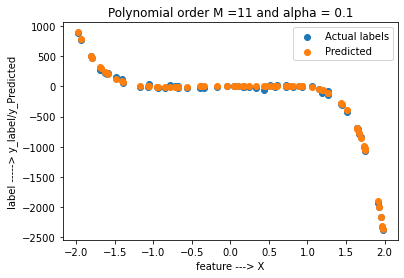

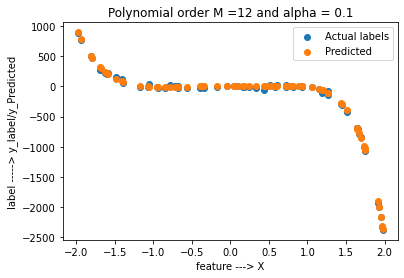

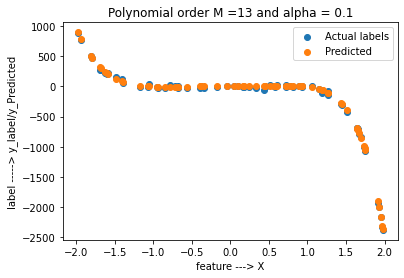

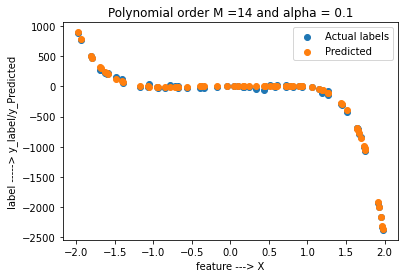

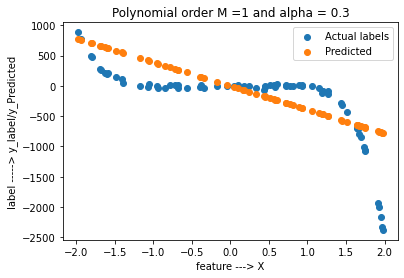

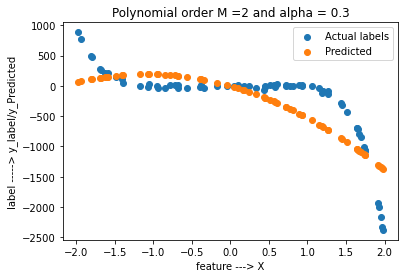

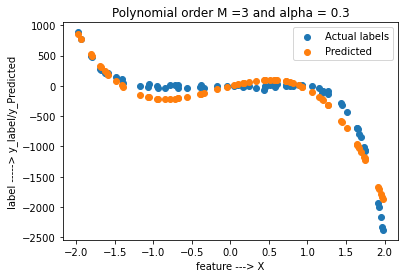

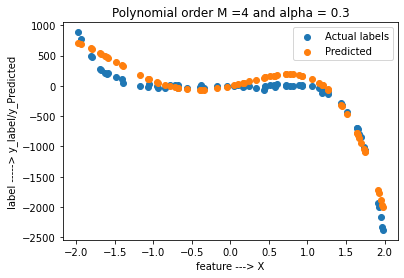

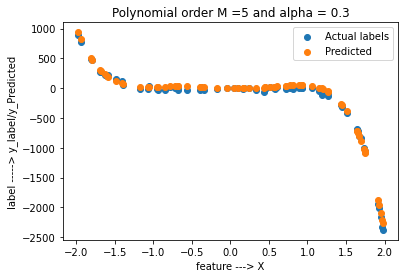

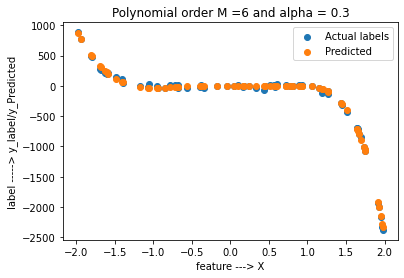

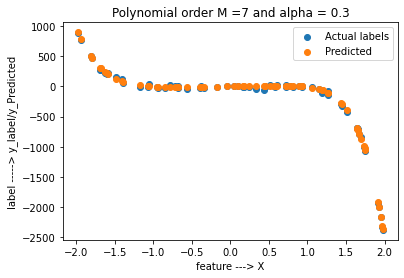

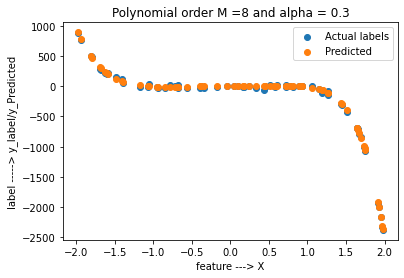

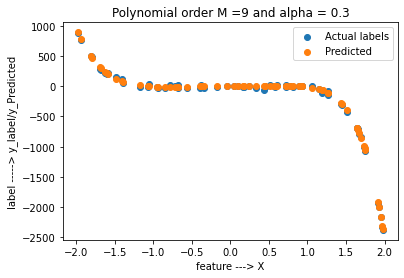

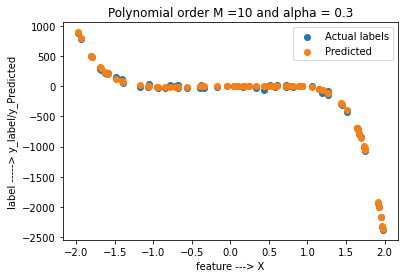

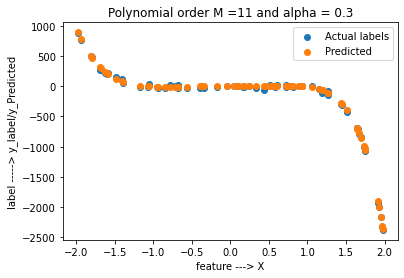

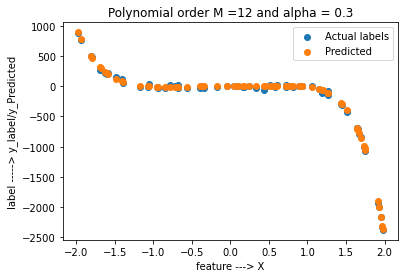

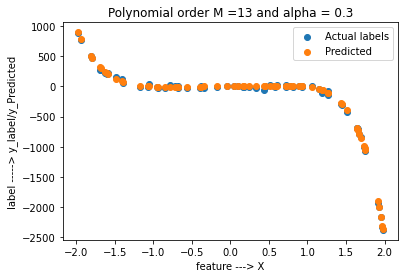

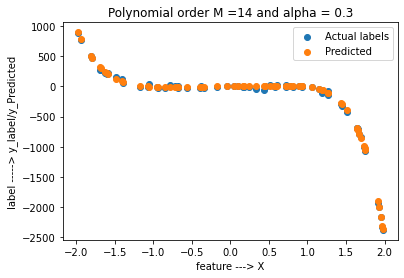

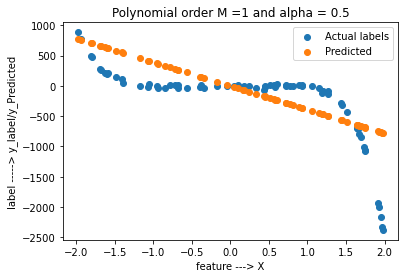

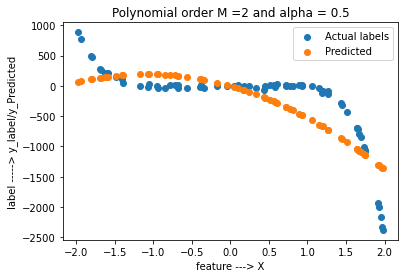

In [ ]:
alpha_ = [0.005,0.008,0.01,0.02,0.06,0.1,0.3,0.5,0.8,1]
for k in alpha_:
    # Training root mean square error 
    train_error = []

    # Test root mean square error 
    test_error = []
    for d in range(1,15):
        
        # Creating polynomial data for degree 'd'
        polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
        poly_features = polynomial_converter.fit_transform(x)
        
        # Splitting new polynomial dataset into train, test
        x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

        # Training on new polynomial dataset
        model = Ridge(alpha=k)
        model.fit(x_train,y_train)

        # Prediction on both training and testing set
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)

        # Calculation of errors

        # Errors on Train Set
        train_rmse_error = np.sqrt(mean_squared_error(y_train,train_pred))
        # Errors on Test Set
        test_rmse_error = np.sqrt(mean_squared_error(y_test,test_pred))
        # Append errors to lists for plotting later
        train_error.append(train_rmse_error)
        test_error.append(test_rmse_error)

        coeff = np.array(model.coef_)
        predicted_y = []

        for j in range(len(df['0'])):
            y_hat =0
            for i in range(d+1):
                y_hat = y_hat + coeff[0][i]*(df['0'].iloc[j])**i
            predicted_y.append(y_hat)

        plt.figure()
        plt.scatter(x,y,label='Actual labels')
        plt.scatter(x,predicted_y,label ='Predicted')
        plt.xlabel('feature ---> X')
        plt.ylabel('label -----> y_label/y_Predicted')
        plt.title(f'Polynomial order M ={d} and alpha = {k}')
        plt.legend()
        plt.show()

In [ ]:
alpha_ = [0.005,0.008,0.01,0.02,0.06,0.1,0.3,0.5,0.8,1]
for k in alpha_:
    # Training root mean square error 
    train_error = []

    # Test root mean square error 
    test_error = []
    for d in range(1,15):
        
        # Creating polynomial data for degree 'd'
        polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
        poly_features = polynomial_converter.fit_transform(x)

        # Splitting new polynomial dataset into train, test
        x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

        # Training on new polynomial dataset
        model = Ridge(alpha=k)
        model.fit(x_train,y_train)

        # Prediction on both training and testing set
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)

        # Calculation of errors

        # Errors on Train Set
        train_rmse_error = np.sqrt(mean_squared_error(y_train,train_pred))
        # Errors on Test Set
        test_rmse_error = np.sqrt(mean_squared_error(y_test,test_pred))
        # Append errors to lists for plotting later
        train_error.append(train_rmse_error)
        test_error.append(test_rmse_error)

    
    fig = plt.figure()
    axes1 = fig.add_axes([0,0,1,1])
    plt.plot(range(1,15),train_error,label='Train error')
    plt.plot(range(1,15),test_error,label='Test error')
    plt.xlabel("Model Complexity (M)")
    plt.ylabel("RMSE")
    axes1.set_xlim(0,12)
    axes1.set_ylim(0,50)
    plt.title(f'Errors ----> alpha = {k}')
    plt.legend()
    plt.show()

In [ ]:
final_poly_converter = PolynomialFeatures(degree=7,interaction_only =False,include_bias=True)
final_poly_features = final_poly_converter.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)
    
# Training
final_model = Ridge(alpha =1)
final_model.fit(x_train,y_train)

# Prediction on both training and testing set
train_pred_ = final_model.predict(x_train)
test_pred_ = final_model.predict(x_test)

# Calculation of errors
# Errors on Train Set
train_RMSE_ = np.sqrt(mean_squared_error(y_train,train_pred_))
print(f'Train root mean squared error is {train_RMSE_}')
# Errors on Test Set
test_RMSE_ = np.sqrt(mean_squared_error(y_test,test_pred_))
print(f'Test root mean squared error is {test_RMSE_}')

In [ ]:
noise_train_ = y_train - train_pred_
noise_test_ = y_test - test_pred_
plt.figure()
sns.displot(noise_train_,kind = 'kde')
plt.title("Train Noise Distribution")
plt.show()
plt.figure()
sns.displot(noise_test_,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()

In [ ]:
train_noise_mean_ = np.mean(noise_train_)
train_noise_var_ = np.var(noise_train_)
test_noise_mean_ = np.mean(noise_test_)
test_noise_var_ = np.var(noise_test_)

In [ ]:
print(f"Train set ---> Mean = {train_noise_mean_}  ; variance = {train_noise_var_}")
print(f"Test set ---> Mean = {test_noise_mean_}  ; variance = {test_noise_var_}")

In [ ]:
model_coefficients = np.array(final_model.coef_)

In [ ]:
model_coefficients[0]

In [ ]:
final_poly_converter.get_feature_names(df1.columns)

In [ ]:
# phi -----> Design Matrix
import numpy.matlib
opt_deg =7
phi = [[0] * (opt_deg+1) for i in range(len(df))]

for i in range(len(df)):
    for d in range(opt_deg+1):
        val = df['0'].iloc[i]**d
        phi[i][d]=val

phi_transpose = [[phi[j][i] for j in range(len(df))] for i in range(d+1)]
weights_ =np.matmul(np.matmul(np.linalg.inv(np.matmul(phi_transpose,phi)),phi_transpose),y)
weights_ =weights_.reshape(1,opt_deg+1)

In [ ]:
# weights -----> coefficient of the polynomial of deg = opt_deg
weights_[0]

In [ ]:
df_test = pd.read_csv('test_Q1A.csv')
X_test = np.array(df_test['0']).reshape(-1,1)
Y_test = np.array(df_test['1']).reshape(-1,1)

In [ ]:
final_poly_converter = PolynomialFeatures(degree=7,interaction_only =False,include_bias=True)
final_poly_features = final_poly_converter.fit_transform(X_test)
pred = final_model.predict(final_poly_features)
plt.scatter(X_test,Y_test,label ='actual_labels')
plt.scatter(X_test,pred,label='Predictions')
plt.xlabel("X_test ")
plt.ylabel("y_actual/ y_predicted")
plt.title(f'Actual labels vs Predictions')
plt.legend()
plt.show()

In [ ]:
noise_test_ = Y_test-pred
sns.displot(noise_test_,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()

In [ ]:
train_noise_mean_ = np.mean(noise_train_)
train_noise_var_ = np.var(noise_train_)

In [ ]:
print(f"Train set ---> Mean = {train_noise_mean_}  ; variance = {train_noise_var_}")